In [166]:
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
from sys import getsizeof
import pickle

In [2]:
def NoramlAsymetricRandomMatrix(n, tau = 0):
    a = np.zeros([n,n]);
    for i1 in range(0,n):
        for i2 in range(i1+1):
            values = np.random.multivariate_normal([0,0], np.array([[1,tau],[tau,1]])/n);
            a[i1, i2] = values[0];
            a[i2, i1] = values[1];
    return a;


In [12]:
tau = -0.4;

W = NoramlAsymetricRandomMatrix(512, tau)
eig, ev = np.linalg.eig(W)


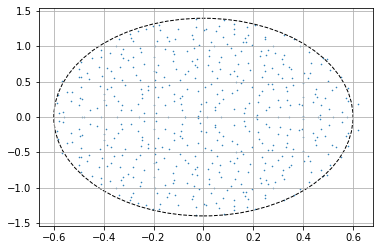

In [11]:
fig,ax = plt.subplots()
ax.scatter(eig.real, eig.imag, s=0.3)
p = matplotlib.patches.Ellipse((0,0), 2*(1+tau), 2*(1-tau), 
                               fill=False, linestyle = '--')
ax.add_patch(p)
ax.grid()

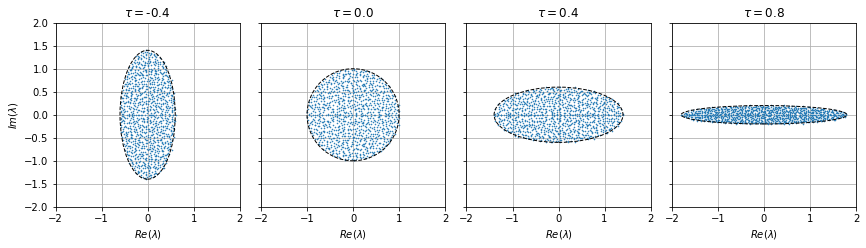

In [244]:
taus = np.linspace(-0.4, 0.8, 4);
fig, axs = plt.subplots(1,4, figsize=(12,4))

for i_t in range(len(taus)):    
    a = NoramlAsymetricRandomMatrix(1024, taus[i_t])
    
    eig, ev = np.linalg.eig(a)
    
    axs[i_t].set_aspect(1)
    axs[i_t].scatter(eig.real, eig.imag, s=0.3) 
    axs[i_t].set_xlim([-2,2])
    axs[i_t].set_ylim([-2,2])
    axs[i_t].set_xlabel('$Re(\lambda)$')
    if(i_t == 0): axs[i_t].set_ylabel('$Im(\lambda)$')
    
    if(i_t > 0): axs[i_t].set_yticklabels([])
    
    
    p = matplotlib.patches.Ellipse((0,0), 2*(1+taus[i_t]), 2*(1-taus[i_t]), 
                                   fill=False, linestyle = '--')
    axs[i_t].add_patch(p)
    axs[i_t].title.set_text('$\\tau=$' + str(np.round(taus[i_t],1)) );
    axs[i_t].grid()
    axs[i_t].set_axisbelow(True)

plt.tight_layout()
plt.savefig('support_asymetric.png', dpi = 128)

In [29]:
is_inside = lambda eig, tau: (np.power(np.real(eig)/(1+tau),2) + np.power(np.imag(eig)/(1-tau),2) <= 1)

In [30]:
sum(is_inside(eig, taus[3]))

1002

In [147]:
Ns = np.int32(np.power(10, np.linspace(1,3.3, 23)).round()); #np.linspace(1,3.3, 23)
eigs_N = [];
nrepeats = 100;

tau = 0.4

for i_n in range(len(Ns)):
    print( Ns[i_n] )
    eigs = np.empty((nrepeats, Ns[i_n]), dtype = np.complex)
    for i_r in range(nrepeats):    
        a = NoramlAsymetricRandomMatrix(Ns[i_n], tau)
        eig, ev = np.linalg.eig(a)
        eigs[i_r, :] = eig;
    eigs_N.append(eigs);

with open('asymetric_eigs.data', 'wb') as filehandle:
    pickle.dump(eigs, filehandle)
with open('asymetric_eigs_Ns.data', 'wb') as filehandle:
    pickle.dump(eigs, filehandle)

10
13
16
21
26
33
42
54
69
87
111
141
180
229
291
370
471
599
762
969
1233
1568
1995


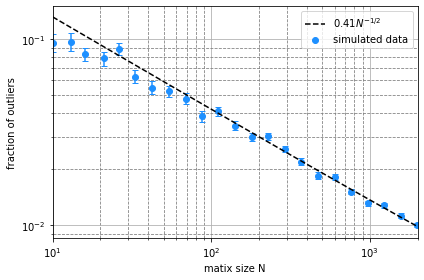

In [243]:
fig,ax = plt.subplots();

fractions = 1 - np.array([is_inside(eigs, tau).mean() for eigs in eigs_N])
errors = np.array([(is_inside(eigs_N[i_n], tau).sum(1) / Ns[i_n]).std() for i_n in range(len(Ns))])

linefit = np.polyfit(1/np.sqrt(Ns[Ns > 1e2]), fractions[Ns > 1e2], deg = 1);

ax.scatter(Ns, fractions, color='dodgerblue' )
ax.errorbar(Ns, fractions, errors/np.sqrt(nrepeats), color='dodgerblue', capsize = 3, ls = 'none')
ax.plot(Ns, linefit[0]/np.sqrt(Ns) + linefit[1], color='black', linestyle = '--')

ax.grid()
ax.grid(b=True, which='minor', color='grey', linestyle='--')
ax.set_axisbelow(True)

ax.set_xscale('log')
ax.set_yscale('log')

plt.legend(('$'+str(np.round(linefit[0],2))+'N^{-1/2}$', 'simulated data'))

plt.ylabel('fraction of outliers');
plt.xlabel('matix size N')
plt.xlim([10, 2000])

plt.tight_layout()
plt.savefig('outliers_asymetric.png', dpi = 128)

In [132]:
x = Ns[i_n]; y = 1 - is_inside(eigs_N[i_n], tau).mean();
    yerr = (is_inside(eigs_N[i_n], tau).sum(1) / Ns[i_n]).std()
    

0.9658203125
0.9658203125
0.01989409061275719
0.18169049634585277


In [239]:
linefit[1]

0.0005707744329116369

In [190]:
linefit

array([-3.61552141e-05,  5.73421691e-02])

In [229]:
linefit[0]

0.41483944199473755